# Models of memory

In [1]:
import numpy as np

# plots
import matplotlib.pyplot as plt

# display imported graphics
from IPython.display import display, Image

```{tip}

*Memory is the mother of all wisdom.*

<p style="text-align:right;">Aeschylus</p>
                             
```

## Heteroassociative memory

### Pair associations

We now pass to further illustrations of elementary capabilities of ANNs, desribing two very simple models of memory based on linear algebra, supplemented with (nonlinear) filtering (an implementation of these models in Mathematica is provided in http://vision.psych.umn.edu/users/kersten/kersten-lab/courses/Psy5038WF2014/IntroNeuralSyllabus.html). Speaking of memory here, we have very simple tools in mind, which is far from the actual complex and hitherto not completely understood memory mechanism operating in our brain. 

The first model concerns the so called **heterassociative** memory, where some objects (here graphic bitmap symbols) are joined in pairs. In particular, we take the set of five graphical symbols, {A, a, I, i, Y}, and define two pair associations A $\leftrightarrow$ a and I $\leftrightarrow$ i between different (hetero) symbols. Y remain unassociated.

The symbols are defined as 2-dimensional $12 \times 12$ pixel arrays, for instance

In [2]:
    A = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],     
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) 

In [3]:
print(A)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


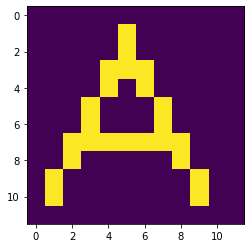

In [4]:
 plt.imshow(A);

The remaining symbols are defined smilarly.

In [5]:
    
a = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],     
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
ii =  np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],  
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
I = np.array( [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
Y =  np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])   

The whole set looks like this, with yellow=1 and violet=0:

In [6]:
sym=[A,a,ii,I,Y] # array of symbols, numbered from 0 to 4

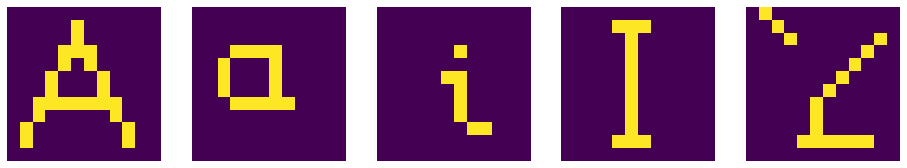

In [7]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(sym[i-1]) # plot symbol, numbered from 0 to 4

It is more convenient to work not with the above two-dimensional arrays, but with one-dimensional vectors obtained with the so-called **flattening** procedure, where a matrix is cut along its rows into a vector. For example 

In [8]:
t=np.array([[1,2,3],[0,4,0],[3,2,7]]) # a matrix
print(t)                            
print(t.flatten())     # matrix flattened into a vector   

[[1 2 3]
 [0 4 0]
 [3 2 7]]
[1 2 3 0 4 0 3 2 7]


We thus perform the flattenning:

In [9]:
fA=A.flatten()
fa=a.flatten()
fi=ii.flatten()
fI=I.flatten()
fY=Y.flatten()

to obtain, for instance

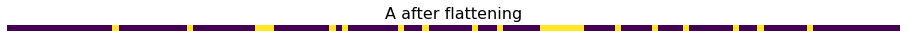

In [10]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("A after flattening",fontsize=16)
plt.imshow([fA]);

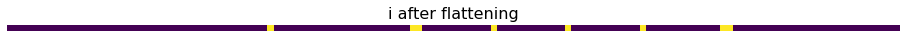

In [11]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("i after flattening",fontsize=16)
plt.imshow([fi]);

The advantage of working with vectors is that we can use the scalar product. Here, the scalar product between two symbols is just equal to the number of common yellow pixels. For instance, for the flattened symbols plotted above we have only two common yellow pixels:

In [12]:
np.dot(fA,fi)

2

It is clear that one can use the scalar product as a measure of similarity between the symbols. For the following method to work, the symbols should not be too similar.

### Memory matrix

The next algebraic concept we need is the **outer product**. For two vectors $v$ and $w$, it is defined as $v w^T = v \otimes w$ (as opposed to the scalar product, where $w^T v = w \cdot v$). $T$ denotes transposition. The result is a matrix with the number of rows equal to the length of $v$, and the number of column equal to the length of $w$.

For example, with

$$ v = \left ( \begin{array}{c} v_1 \\ v_2 \\v_3 \end{array}  \right ), \;\;\;\; w = \left ( \begin{array}{c} w_1 \\ w_2 \end{array}  \right ), $$

we have 

$$ 
v \otimes w = v w^T=
\left ( \begin{array}{c} v_1 \\ v_2 \\v_3 \end{array}  \right ) (w_1,w_2)
= \left ( \begin{array}{cc} v_1 w_1 & v_1 w_2 \\ v_2 w_1 & v_2 w_2 \\v_3 v_1 & v_3 w_2 \end{array}  \right ).
$$

In numpy

In [13]:
print(np.outer([1,2,3],[2,7])) # outer product of two vectors

[[ 2  7]
 [ 4 14]
 [ 6 21]]


Next, we construct a **memory matrix** needed for modeling our heteroassociative memory. Suppose first for simplicity of notation that we only have two associations: $a \to A$ and $b \to B$. 
Let 

$$M = A a^T/a\cdot a + B b^T/b\cdot b.$$ 

Then 

$$M a=  A + B \, a\cdot b /b \cdot a, $$ 

and if $a$ and $b$ were **orthogonal**, i.e. $a \cdot b =0$, then

$ M a =  A$ 

yielding an exact association. Similarly, we would have $M b = B$. However, since in a general case the vectors are not exactly orthogonal, an error $B \, b \cdot a/a \cdot a$ (for the association of $a$) is generated. It is usually small if the number of pixels in our symbols is large and the symbols are, loosely speaking, not too similar. As we will see, the emerging error can be efficiently "filtered out" with an appropriate neuron activation function.

Coming back to our particular case, we thus need four terms in $M$:

In [14]:
M=(np.outer(fA,fa)/np.dot(fa,fa)+np.outer(fa,fA)/np.dot(fA,fA)
   +np.outer(fi,fI)/np.dot(fI,fI)+np.outer(fI,fi)/np.dot(fi,fi)); # associated pairs

Now, for each flattened symbol $s$ we will evaluate $Ms$. The result is a vector, which we want to bring back to the form of the $12\times 12$ pixel array. The operation inverse to flattening in Python is **reshape**. For instance 

In [15]:
tt=np.array([1,2,3,5]) # test vector
print(tt.reshape(2,2)) # cutting into 2 rows of length 2

[[1 2]
 [3 5]]


For our vectors we have

In [16]:
Ap=np.dot(M,fA).reshape(12,12)
ap=np.dot(M,fa).reshape(12,12)
Ip=np.dot(M,fI).reshape(12,12)
ip=np.dot(M,fi).reshape(12,12)
Yp=np.dot(M,fY).reshape(12,12) # we also try unassociated symbol Y

symp=[Ap,ap,Ip,ip,Yp] # array of associated symbols

For the case of association to A (which shou
ld be a), it yields (we use rounding to 2 decimal digits)

In [17]:
print(np.round(Ap,2)) # pixel map for the association of the symbol A

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.85 0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.6  1.85 1.89 0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.6  0.25 1.6  0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.6  0.   0.54 1.29 0.6  0.   0.   0.   0.  ]
 [0.   0.   1.   0.6  0.   0.25 1.29 0.6  0.   0.   0.   0.  ]
 [0.   0.   0.6  1.6  1.6  1.85 1.89 1.6  0.6  0.   0.   0.  ]
 [0.   0.   0.6  0.   0.   0.25 0.29 0.   0.6  0.   0.   0.  ]
 [0.   0.6  0.   0.   0.   0.25 0.   0.29 0.29 0.6  0.   0.  ]
 [0.   0.6  0.   0.   0.25 0.25 0.25 0.   0.   0.6  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


We note that the strength of pixels is now not necessarily equal to 0 or 1, as it was in the original symbols. The graphic representation looks as follows:

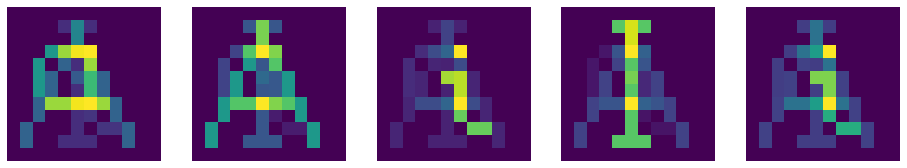

In [18]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(symp[i-1]) # plot symbol, numbered from 0 to 4

We should be able to see in the above picture the sequence a, A, i, I, and nothing particular in the association of Y. We almost do, but the situation is not perfect due to the nonorthogonality error discussed above. 

### Applying a filter

The result improves greatly when a filter is applied to the pixel maps. Looking at the above print out or the plot of Ap (the symbol associated to A which shoul be a), we note that we should get rid of the "faint shadows", and leave only the pixels of suffient strength, which should then acquire the value 1. In other words, pixels below a bias (threshold) $b$ should be reset to 0, and those above or equal to $b$ should be reset to 1. This can be neatly accomplished with our **neuron** function from Sec. {ref}`mcp_P-lab`. This function has been placed in the library **neural** (see [Appendix](app-lab)), which we now read in:

In [19]:
import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

Invoking __init__.py for neural


We thus define the filter as a neuron with weight $w_0=-b$ and $w_1=1$:

In [20]:
def filter(a,b): # a - symbol (2-dim pixel array), b - bias
    n=len(a)     # number of rows (and columns)
    return np.array([[func.neuron([a[i,j]],[-b,1]) for j in range(n)] for i in range(n)])
       # 2-dim array with the filter applied

When operating on Ap with appropriately chosen $b=0.9$ (the level of the bias is very much relevant), the result is

In [21]:
print(filter(Ap,.9))

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


where we can notice a "clean" symbol a. We check that it actually works perfectly well for all our accociations (such perfection is not always the case):

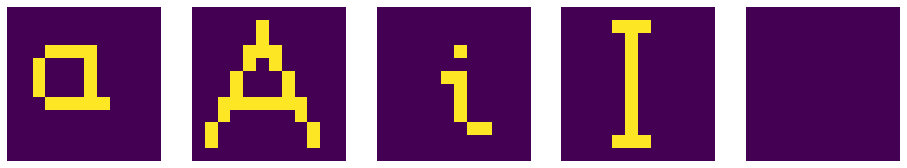

In [22]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(filter(symp[i-1],0.9)) # plot symbol, numbered from 0 to 4

A representation of the presented model of the heteroassociative memory in terms of ANN can be readily given. In the plot below we indicate all the operations, going from left to right. The input symbol is flattened. The input and output layers are fully connected with edges (not shown) connecting the input cells to the neurons in the output layer. The weights of the edges are equal to the matrix elements $M_{ij}$, indicated with symbol M. The activation function is the same for all neurons and it has the form of a step function.

At the bottom we indicate the elements of the input vector, $x_i$, of the signal reaching the neuron $j$, $s_j=\sum_i x_i M_{ij}$, and the final output $y_j=f(s_j)$.

In [23]:
def filter1(a,b): # a - symbol (1-dim pixel array), b - bias
    n=len(a)     # number of rows (and columns)
    return np.array([func.neuron([a[i]],[-b,1]) for i in range(n)])
       # 1-dim array with the filter applied

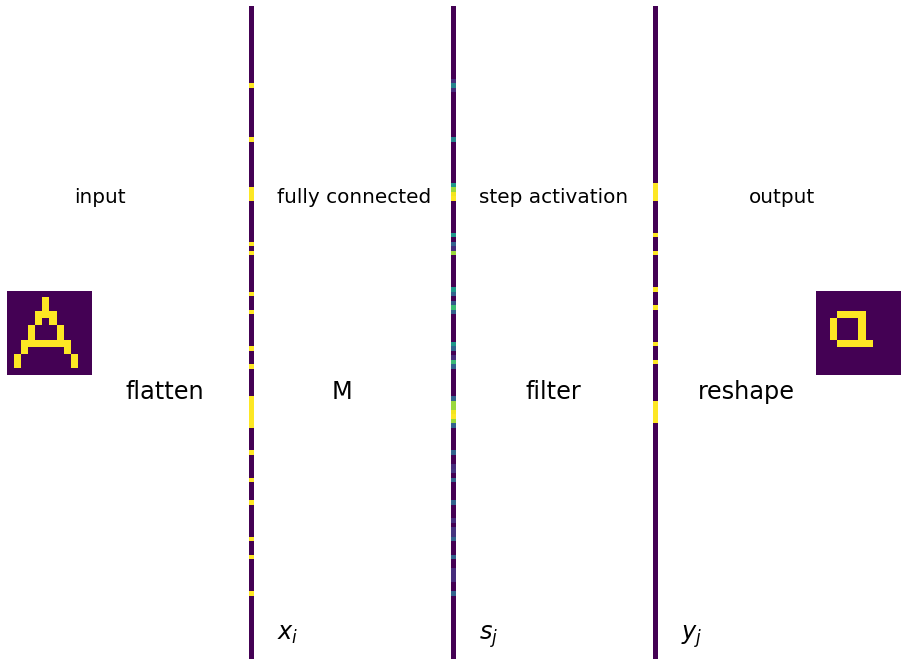

In [24]:
plt.figure(figsize=(16, 12)) # figure with horizontal and vertical size

plt.subplot(1, 9, 1)
plt.axis('off') 
plt.imshow(A);


plt.subplot(1, 9, 2) 
plt.axis('off') 
plt.text(0.2,0.4,'flatten',fontsize=24)
plt.text(-.4,0.7,'input',fontsize=20);


plt.subplot(1, 9, 3) 
plt.axis('off') 
plt.imshow(np.transpose([fA]))

plt.subplot(1, 9, 4) 
plt.axis('off') 
plt.text(0.25,0.4,'M',fontsize=24)
plt.text(-0.4,0.7,'fully connected',fontsize=20)
plt.text(-0.4,0.03,'$x_i$',fontsize=24);

fAp=np.dot(M,fA)

plt.subplot(1, 9, 5) 
plt.axis('off') 
plt.imshow(np.transpose([fAp]));

plt.subplot(1, 9, 6) 
plt.axis('off') 
plt.text(0.15,0.4,'filter',fontsize=24)
plt.text(-0.4,0.7,'step activation',fontsize=20)
plt.text(-0.4,0.03,'$s_j$',fontsize=24);

plt.subplot(1, 9, 7) 
plt.axis('off') 
plt.imshow(np.transpose([filter1(fAp,.9)]));

plt.subplot(1, 9, 8)
plt.axis('off') 
plt.text(-.20,0.4,'reshape',fontsize=24)
plt.text(.4,0.7,'output',fontsize=20)
plt.text(-0.4,0.03,'$y_j$',fontsize=24);

plt.subplot(1, 9, 9)
plt.axis('off') 
plt.imshow(filter(Ap,.9));





```{admonition} Summary of the model of the heteroassociative memory


0. Define pairs of associated symbols and construct the memory matrix $M$. 

1. The input is a symbol in the form of a 2-dim array of pixels with values 0 or 1.

2. Flaten the symbol into a vector, which forms the layer of inputs $x_i$.

3. The weight matrix of the fully connected ANN is $M$.

4. The signal entering neuron $j$ in the output layer is $s_j=\sum_i x_i M_{ij}$.

5. The activation (step) function with a properly chosen bias yields $y_j=f(s_j)$.

6. Cut the output vector into a matrix of pixels, which constitutes the final output.
It should be the symbol associated to the input.
```

## Autoassociative memory

### Self-associations

The autoassociative memory model is in close analogy to the case of the heteroassociatine memory, but now the symbol is associated **to itself**. Why we do such a thing will become clear shortly, when we consider distorted input. We thus define the association matrix as follows:

In [25]:
Ma=(np.outer(fA,fA)/np.dot(fA,fA)+np.outer(fa,fa)/np.dot(fa,fa)
    +np.outer(fi,fi)/np.dot(fi,fi)+np.outer(fI,fI)/np.dot(fI,fI))

In [26]:
Ap=np.dot(Ma,fA).reshape(12,12)
ap=np.dot(Ma,fa).reshape(12,12)
Ip=np.dot(Ma,fI).reshape(12,12)
ip=np.dot(Ma,fi).reshape(12,12)
Yp=np.dot(Ma,fY).reshape(12,12)

symp=[Ap,ap,Ip,ip,Yp] # array of self-associated symbols

After multiplying the flattened symbol with matrix Ma, reshaping, and filtering (all steps as in the heteroassociative case) we properly get back th original symbols (except for Y, which was not associated). 

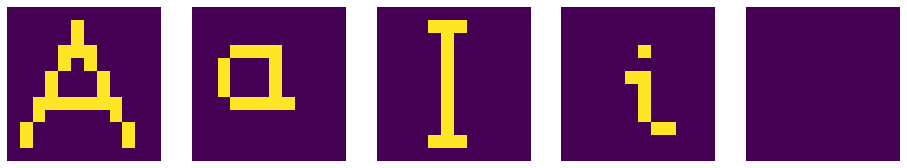

In [27]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(filter(symp[i-1],0.9)) # plot symbol, numbered from 0 to 4

### Distorting the image

Now imagine that the original input gets partially destroyed, with some pixels randomly altered from 1 to 0 and vice versa. 

In [28]:
ne=12 # number of alterations

for s in sym:                     # loop over symbols
    for _ in range(ne):           # loop over alteratons
        i=np.random.randint(0,12) # random position in row
        j=np.random.randint(0,12) # random position in column
        s[i,j]=1-s[i,j]           # switching 1 and 0

After this the input symbols look like this:

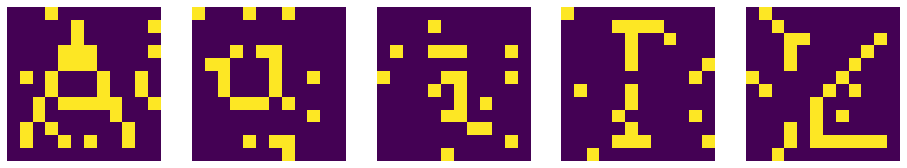

In [29]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(sym[i-1]) # plot symbol, numbered from 0 to 4

### Restoring the symbols

We now apply our model of the autoassociative memory to all the "distroyed" symbols:

In [30]:
Ap=np.dot(Ma,fA).reshape(12,12)
ap=np.dot(Ma,fa).reshape(12,12)
Ip=np.dot(Ma,fI).reshape(12,12)
ip=np.dot(Ma,fi).reshape(12,12)
Yp=np.dot(Ma,fY).reshape(12,12)

symp=[Ap,ap,Ip,ip,Yp] # array of self-associated symbols

which yields

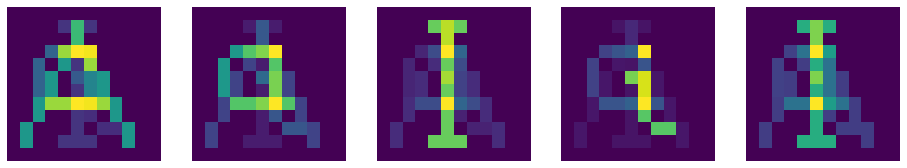

In [31]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):      # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i)  # panels, numbered from 1 to 5
    plt.axis('off')       # no axes
    plt.imshow(symp[i-1]) # plot symbol, numbered from 0 to 4

After filtering, with $b=0.9$, we obtain back the original symbols:

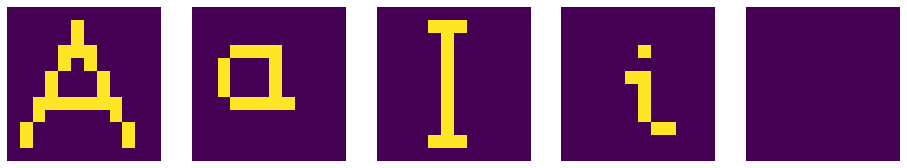

In [32]:
plt.figure(figsize=(16, 6))

for i in range(1,6):      # loop over panels
    plt.subplot(1, 5, i)  
    plt.axis('off')       
    plt.imshow(filter(symp[i-1],0.9)) # plot filtered symbol


```{admonition} Summary of the model of the autooassociative memory


0. Construct the memory matrix $Ma$. 

1. The input is a symbol in the form of a 2-dim array of pixels with values 0 or 1, with a 
certain number of pixels randomly distorted.

2. Flaten the symbol into a vector, which forms the layer of inputs $x_i$.

3. The weight matrix of the fully connected ANN is $Ma$.

4. The signal entering neuron $j$ in the output layer is $s_j=\sum_i x_i M_{ij}$.

5. The activation (step) function with a properly chosen bias yields $y_j=f(s_j)$.

6. Cut the output vector into a matrix of pixels, which constitutes the final output. It should bring back the ariginal symbol.
```

The application can thus decifer a "destroyed" text, or, more generally, 
provide an error correcion mechanism.

```{important}
Message: ANN can serve as very simple models of memory!
```

```{admonition} Exercises
:class: warning

Play with the lecture code and 

- add more and more symbols,
- change the filter level,
- increase the number of alterations. 

Discuss your findings.

```
